In [1]:
import requests

In [2]:
r = requests.get('http://www.citibikenyc.com/stations/json')

In [3]:
r.text

u'{"executionTime":"2016-10-16 09:20:32 PM","stationBeanList":[{"id":72,"stationName":"W 52 St & 11 Ave","availableDocks":30,"totalDocks":39,"latitude":40.76727216,"longitude":-73.99392888,"statusValue":"In Service","statusKey":1,"availableBikes":8,"stAddress1":"W 52 St & 11 Ave","stAddress2":"","city":"","postalCode":"","location":"","altitude":"","testStation":false,"lastCommunicationTime":"2016-10-16 09:19:40 PM","landMark":""},{"id":79,"stationName":"Franklin St & W Broadway","availableDocks":16,"totalDocks":33,"latitude":40.71911552,"longitude":-74.00666661,"statusValue":"In Service","statusKey":1,"availableBikes":14,"stAddress1":"Franklin St & W Broadway","stAddress2":"","city":"","postalCode":"","location":"","altitude":"","testStation":false,"lastCommunicationTime":"2016-10-16 09:19:25 PM","landMark":""},{"id":82,"stationName":"St James Pl & Pearl St","availableDocks":0,"totalDocks":27,"latitude":40.71117416,"longitude":-74.00016545,"statusValue":"In Service","statusKey":1,"ava

In [4]:
r.json()

{u'executionTime': u'2016-10-16 09:20:32 PM',
 u'stationBeanList': [{u'altitude': u'',
   u'availableBikes': 8,
   u'availableDocks': 30,
   u'city': u'',
   u'id': 72,
   u'landMark': u'',
   u'lastCommunicationTime': u'2016-10-16 09:19:40 PM',
   u'latitude': 40.76727216,
   u'location': u'',
   u'longitude': -73.99392888,
   u'postalCode': u'',
   u'stAddress1': u'W 52 St & 11 Ave',
   u'stAddress2': u'',
   u'stationName': u'W 52 St & 11 Ave',
   u'statusKey': 1,
   u'statusValue': u'In Service',
   u'testStation': False,
   u'totalDocks': 39},
  {u'altitude': u'',
   u'availableBikes': 14,
   u'availableDocks': 16,
   u'city': u'',
   u'id': 79,
   u'landMark': u'',
   u'lastCommunicationTime': u'2016-10-16 09:19:25 PM',
   u'latitude': 40.71911552,
   u'location': u'',
   u'longitude': -74.00666661,
   u'postalCode': u'',
   u'stAddress1': u'Franklin St & W Broadway',
   u'stAddress2': u'',
   u'stationName': u'Franklin St & W Broadway',
   u'statusKey': 1,
   u'statusValue': u'I

In [5]:
r.json().keys()

[u'executionTime', u'stationBeanList']

In [6]:
r.json()['executionTime']

u'2016-10-16 09:20:32 PM'

In [7]:
r.json()['stationBeanList']

[{u'altitude': u'',
  u'availableBikes': 8,
  u'availableDocks': 30,
  u'city': u'',
  u'id': 72,
  u'landMark': u'',
  u'lastCommunicationTime': u'2016-10-16 09:19:40 PM',
  u'latitude': 40.76727216,
  u'location': u'',
  u'longitude': -73.99392888,
  u'postalCode': u'',
  u'stAddress1': u'W 52 St & 11 Ave',
  u'stAddress2': u'',
  u'stationName': u'W 52 St & 11 Ave',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 39},
 {u'altitude': u'',
  u'availableBikes': 14,
  u'availableDocks': 16,
  u'city': u'',
  u'id': 79,
  u'landMark': u'',
  u'lastCommunicationTime': u'2016-10-16 09:19:25 PM',
  u'latitude': 40.71911552,
  u'location': u'',
  u'longitude': -74.00666661,
  u'postalCode': u'',
  u'stAddress1': u'Franklin St & W Broadway',
  u'stAddress2': u'',
  u'stationName': u'Franklin St & W Broadway',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 33},
 {u'altitude': u'',
  u'availableBikes': 

In [8]:
len(r.json()['stationBeanList'])

664

In [9]:
key_list = []
for station in r.json()['stationBeanList']:
    for k in station.keys():
        if k not in key_list:
            key_list.append(k)

In [10]:
print(key_list)

[u'availableDocks', u'totalDocks', u'city', u'altitude', u'stAddress2', u'longitude', u'lastCommunicationTime', u'postalCode', u'statusValue', u'testStation', u'stAddress1', u'stationName', u'landMark', u'latitude', u'statusKey', u'availableBikes', u'id', u'location']


In [11]:
r.json()['stationBeanList'][0]

{u'altitude': u'',
 u'availableBikes': 8,
 u'availableDocks': 30,
 u'city': u'',
 u'id': 72,
 u'landMark': u'',
 u'lastCommunicationTime': u'2016-10-16 09:19:40 PM',
 u'latitude': 40.76727216,
 u'location': u'',
 u'longitude': -73.99392888,
 u'postalCode': u'',
 u'stAddress1': u'W 52 St & 11 Ave',
 u'stAddress2': u'',
 u'stationName': u'W 52 St & 11 Ave',
 u'statusKey': 1,
 u'statusValue': u'In Service',
 u'testStation': False,
 u'totalDocks': 39}

In [12]:
from pandas.io.json import json_normalize
df = json_normalize(r.json()['stationBeanList'])

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

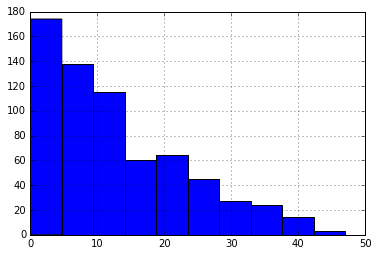

In [14]:
df['availableBikes'].hist()
plt.show()

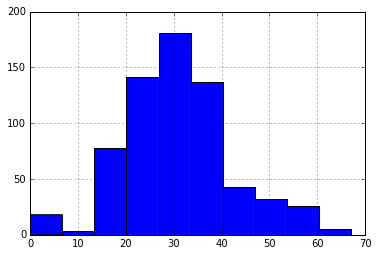

In [16]:
df['totalDocks'].hist()
plt.show()

# 1. Explore the other data variables. Are there any test stations? How many stations are "In Service"? How many are "Not In Service"? Any other interesting variables values that need to be accounted for?

In [30]:
df['testStation'].value_counts()

False    664
Name: testStation, dtype: int64

There are no test stations.

In [31]:
df['statusValue'].value_counts()

In Service        640
Not In Service     24
Name: statusValue, dtype: int64

640 stations are "In Service" and 24 stations are "Not in Service."

# 2. What is the mean number of bikes in a station? What is the median? How does this change if we remove the stations that aren't in service?

In [36]:
df['availableBikes'].mean()

12.82078313253012

In [37]:
df['availableBikes'].median()

10.0

In [40]:
bikes_in_service = df[df['statusValue']=='In Service']

In [41]:
bikes_in_service['availableBikes']

0       8
1      14
2      27
3      29
4      39
5       4
6       6
7      29
8      26
9       0
10      5
11      6
12     38
13     33
14     16
15      2
16     27
17     10
18      3
19     25
20      7
21      8
22     40
23     12
24     17
25     16
26      9
27      7
28     15
30     21
       ..
634    28
635    21
636     5
637     3
638     7
639    23
640     5
641    12
642     6
643     8
644     1
645     5
646     3
647    20
648     8
649    16
650    16
651    23
652    16
653    12
654    12
655    27
656    19
657    16
658    32
659     5
660     4
661    18
662    30
663    22
Name: availableBikes, dtype: int64

In [42]:
len(bikes_in_service)

640

In [44]:
bikes_in_service['availableBikes'].mean()

13.3015625

In [45]:
bikes_in_service['availableBikes'].median()

11.0

Mean and median both go up if we remove the stations that aren't in service.

In [46]:
df['totalDocks'].mean()

30.677710843373493

In [47]:
condition = (df['statusValue'] == 'In Service')
df[condition]['totalDocks'].mean()

31.590625

In [48]:
df['totalDocks'].median()

30.0

In [49]:
df[df['statusValue'] == 'In Service']['totalDocks'].median()

31.0

In [50]:
import sqlite3 as lite

con = lite.connect('citi_bike.db')
cur = con.cursor()

with con:
    cur.execute('CREATE TABLE citibike_reference (id INT PRIMARY KEY, totalDocks INT, city TEXT, altitude INT, stAddress2 TEXT, longitude NUMERIC, postalCode TEXT, testStation TEXT, stAddress1 TEXT, stationName TEXT, landMark TEXT, latitude NUMERIC, location TEXT )')

In [51]:
sql = "INSERT INTO citibike_reference (id, totalDocks, city, altitude, stAddress2, longitude, postalCode, testStation, stAddress1, stationName, landMark, latitude, location) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)"

with con:
    for station in r.json()['stationBeanList']:
        cur.execute(sql,(station['id'],station['totalDocks'],station['city'],station['altitude'],station['stAddress2'],station['longitude'],station['postalCode'],station['testStation'],station['stAddress1'],station['stationName'],station['landMark'],station['latitude'],station['location']))

In [52]:
station_ids = df['id'].tolist() 

station_ids = ['_' + str(x) + ' INT' for x in station_ids]

with con:
    cur.execute("CREATE TABLE available_bikes ( execution_time INT, " +  ", ".join(station_ids) + ");")

In [53]:
import time

from dateutil.parser import parse 

import collections

exec_time = parse(r.json()['executionTime'])

In [54]:
with con:
    cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', (exec_time.strftime('%s'),))

In [55]:
id_bikes = collections.defaultdict(int)

for station in r.json()['stationBeanList']:
    id_bikes[station['id']] = station['availableBikes']

with con:
    for k, v in id_bikes.iteritems():
        cur.execute("UPDATE available_bikes SET _" + str(k) + " = " + str(v) + " WHERE execution_time = " + exec_time.strftime('%s') + ";")

## 1. Now that the tables have been created, create a script based on the code you've written so far that downloads the data, parses the result, and then uploads the data to the database.

In [56]:
#Unit 3 Lesson 1 Assignment 4 Challenge - Still needs additional work

r = requests.get('http://www.citibikenyc.com/stations/json')
df = json_normalize(r.json()['stationBeanList'])
exec_time = parse(r.json()['executionTime'])

with con:
    cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', (exec_time.strftime('%s'),))

id_bikes = collections.defaultdict(int)

for station in r.json()['stationBeanList']:
    id_bikes[station['id']] = station['availableBikes']

with con:
    for k, v in id_bikes.iteritems():
        cur.execute("UPDATE available_bikes SET _" + str(k) + " = " + str(v) + " WHERE execution_time = " + exec_time.strftime('%s') + ";")

OperationalError: no such column: _3437

## 2. The code then needs to sleep for a minute and then perform the same task. Find a way to make this happen in your code.
## 3. The code only needs to run for an hour. If it's sleeping every minute, the code only needs to loop 60 times. Find a way of doing this.